# 분류로 quality 판단

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import PolynomialFeatures

warnings.filterwarnings('ignore')

In [2]:
df_red = pd.read_csv('C:/Users/yosim/Desktop/AI_STUDY/wine+quality/winequality-red.csv', delimiter=';')
df_red = df_red.reset_index(drop=True)
df_red['color'] = 0
df_red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


In [3]:
df_white = pd.read_csv('C:/Users/yosim/Desktop/AI_STUDY/wine+quality/winequality-white.csv', delimiter=';')
df_white = df_white.reset_index(drop=True)
df_white['color'] = 1
df_white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


In [4]:
df = pd.concat([df_red, df_white], axis=0)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


In [5]:
missing_values = df.isnull().sum()

# 전체 결측치 개수 확인
total_missing = df.isnull().sum().sum()

# 결과 출력
print("각 열의 결측치 개수:")
print(missing_values)

print("\n전체 결측치 개수:", total_missing)

각 열의 결측치 개수:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
dtype: int64

전체 결측치 개수: 0


In [6]:
y = df['quality']
y

0       5
1       5
2       5
3       6
4       5
       ..
4893    6
4894    5
4895    6
4896    7
4897    6
Name: quality, Length: 6497, dtype: int64

In [7]:
x = df.drop('quality',axis=1)
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,1
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,1
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,1
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,1


## Standard Scale & PolynomialFeature

In [8]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=423)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((4872, 12), (1625, 12), (4872,), (1625,))

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

In [10]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

In [11]:
# SVM

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

clf_svm = SVC(random_state=0)
clf_svm.fit(X_train_poly, y_train)

pred_svm = clf_svm.predict(X_test_poly)

print("\n--- SVM Classifier ---")
print(accuracy_score(y_test, pred_svm))
print(confusion_matrix(y_test, pred_svm))


--- SVM Classifier ---
0.579076923076923
[[  0   0   1   5   0   0   0]
 [  0   1  34  19   0   0   0]
 [  0   0 341 210   1   0   0]
 [  0   0 148 547  26   0   0]
 [  0   0   7 194  52   0   0]
 [  0   0   0  30   7   0   0]
 [  0   0   0   1   1   0   0]]


In [12]:
# LR

from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train_poly, y_train)

pred_lr = clf_lr.predict(X_test_poly)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))


--- Logistic Regression Classifier ---
0.5753846153846154
[[  0   1   1   4   0   0   0]
 [  0   7  32  13   2   0   0]
 [  0   5 353 189   4   1   0]
 [  0   0 170 478  73   0   0]
 [  0   0  13 139  97   4   0]
 [  0   0   0  30   7   0   0]
 [  0   0   0   0   2   0   0]]


In [13]:
# DT

from sklearn.tree import DecisionTreeClassifier

clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train_poly, y_train)

pred_dt = clf_dt.predict(X_test_poly)

print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))


--- Decision Tree Classifier ---
0.6221538461538462
[[  0   1   3   1   1   0   0]
 [  0  12  24  14   4   0   0]
 [  4  20 380 117  23   7   1]
 [  5  14 143 454  82  23   0]
 [  0   7  19  69 146  12   0]
 [  0   0   3   5  10  19   0]
 [  0   0   0   0   2   0   0]]


In [14]:
# RT

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

print ("\n--- Random Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train_poly, y_train)
pred = rf_clf.predict(X_test_poly)
print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))


--- Random Forest ---
0.692923076923077
[[  0   0   2   4   0   0   0]
 [  0   6  33  15   0   0   0]
 [  0   1 408 140   3   0   0]
 [  0   1 127 553  39   1   0]
 [  0   0   8 100 142   3   0]
 [  0   0   0  12   8  17   0]
 [  0   0   0   0   2   0   0]]


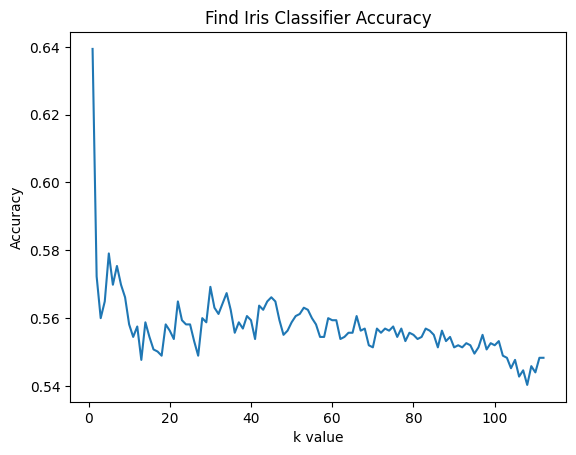

In [15]:
# KNN

from sklearn.neighbors import KNeighborsClassifier

k_range = range(1, 113)
find_accuracy = []

for k in k_range:
  find_model = KNeighborsClassifier(n_neighbors = k)
  find_model.fit(X_train_poly, y_train.values.ravel())

  find_accuracy.append(find_model.score(X_test_poly, y_test))
  
plt.plot(k_range, find_accuracy, label="training accuracy")
plt.xlabel("k value")
plt.ylabel("Accuracy")
plt.title("Find Iris Classifier Accuracy")
plt.show()

## Mix Max Scale & PolynomialFeature

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=423)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4872, 12), (1625, 12), (4872,), (1625,))

In [17]:
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

In [19]:
# SVM

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

clf_svm = SVC(random_state=0)
clf_svm.fit(X_train_poly, y_train)

pred_svm = clf_svm.predict(X_test_poly)

print("\n--- SVM Classifier ---")
print(accuracy_score(y_test, pred_svm))
print(confusion_matrix(y_test, pred_svm))


--- SVM Classifier ---
0.5575384615384615
[[  0   0   2   4   0   0   0]
 [  0   0  38  16   0   0   0]
 [  0   0 348 203   1   0   0]
 [  0   0 172 546   3   0   0]
 [  0   0  19 222  12   0   0]
 [  0   0   4  31   2   0   0]
 [  0   0   0   2   0   0   0]]


In [20]:
# LR

from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train_poly, y_train)

pred_lr = clf_lr.predict(X_test_poly)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))


--- Logistic Regression Classifier ---
0.5636923076923077
[[  0   0   2   3   1   0   0]
 [  0   0  38  16   0   0   0]
 [  0   0 351 194   7   0   0]
 [  0   0 179 500  42   0   0]
 [  0   0  13 175  65   0   0]
 [  0   0   1  30   6   0   0]
 [  0   0   0   0   2   0   0]]


In [21]:
# DT

from sklearn.tree import DecisionTreeClassifier

clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train_poly, y_train)

pred_dt = clf_dt.predict(X_test_poly)

print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))


--- Decision Tree Classifier ---
0.5833846153846154
[[  0   1   2   2   1   0   0]
 [  0  16  18  15   2   3   0]
 [  3  15 363 150  17   3   1]
 [  3  16 150 417 119  16   0]
 [  0   3  25  76 132  17   0]
 [  0   0   1   9   7  20   0]
 [  0   0   0   0   2   0   0]]


In [22]:
# RT

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

print ("\n--- Random Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train_poly, y_train)
pred = rf_clf.predict(X_test_poly)
print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))


--- Random Forest ---
0.6843076923076923
[[  0   1   2   3   0   0   0]
 [  0   8  32  14   0   0   0]
 [  0   1 406 140   5   0   0]
 [  0   3 126 538  54   0   0]
 [  0   0   8 102 142   1   0]
 [  0   0   0  11   8  18   0]
 [  0   0   0   1   1   0   0]]


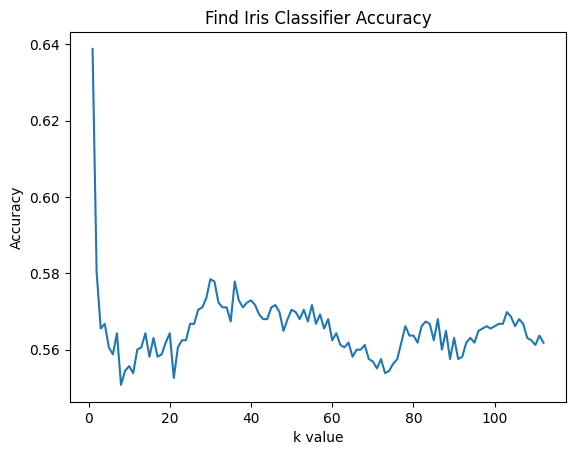

In [23]:
# KNN

from sklearn.neighbors import KNeighborsClassifier

k_range = range(1, 113)
find_accuracy = []

for k in k_range:
  find_model = KNeighborsClassifier(n_neighbors = k)
  find_model.fit(X_train_poly, y_train.values.ravel())

  find_accuracy.append(find_model.score(X_test_poly, y_test))
  
plt.plot(k_range, find_accuracy, label="training accuracy")
plt.xlabel("k value")
plt.ylabel("Accuracy")
plt.title("Find Iris Classifier Accuracy")
plt.show()

## Robust Scale & PolynomialFeature

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=423)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4872, 12), (1625, 12), (4872,), (1625,))

In [25]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

In [27]:
# SVM

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

clf_svm = SVC(random_state=0)
clf_svm.fit(X_train_poly, y_train)

pred_svm = clf_svm.predict(X_test_poly)

print("\n--- SVM Classifier ---")
print(accuracy_score(y_test, pred_svm))
print(confusion_matrix(y_test, pred_svm))


--- SVM Classifier ---
0.5587692307692308
[[  0   0   2   4   0   0   0]
 [  0   0  31  23   0   0   0]
 [  0   0 295 256   1   0   0]
 [  0   0 119 600   2   0   0]
 [  0   0   7 233  13   0   0]
 [  0   0   0  36   1   0   0]
 [  0   0   0   1   1   0   0]]


In [28]:
# LR

from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train_poly, y_train)

pred_lr = clf_lr.predict(X_test_poly)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))


--- Logistic Regression Classifier ---
0.5753846153846154
[[  0   0   1   4   0   1   0]
 [  0   6  33  14   1   0   0]
 [  1   3 351 188   7   2   0]
 [  0   0 167 483  70   1   0]
 [  0   0  14 142  95   2   0]
 [  0   0   1  27   9   0   0]
 [  0   0   0   0   2   0   0]]


In [29]:
# DT

from sklearn.tree import DecisionTreeClassifier

clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train_poly, y_train)

pred_dt = clf_dt.predict(X_test_poly)

print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))


--- Decision Tree Classifier ---
0.6215384615384615
[[  0   1   5   0   0   0   0]
 [  0  15  25  10   3   1   0]
 [  0  16 372 125  32   7   0]
 [  1  13 136 465  97   9   0]
 [  2   4  15  77 141  13   1]
 [  0   0   5   5  10  17   0]
 [  0   0   0   1   1   0   0]]


In [30]:
# RT

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

print ("\n--- Random Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train_poly, y_train)
pred = rf_clf.predict(X_test_poly)
print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))


--- Random Forest ---
0.683076923076923
[[  0   1   1   4   0   0   0]
 [  0   7  33  14   0   0   0]
 [  0   1 400 143   7   1   0]
 [  0   0 121 549  49   2   0]
 [  0   0   8 106 136   3   0]
 [  0   0   0  10   9  18   0]
 [  0   0   0   0   2   0   0]]


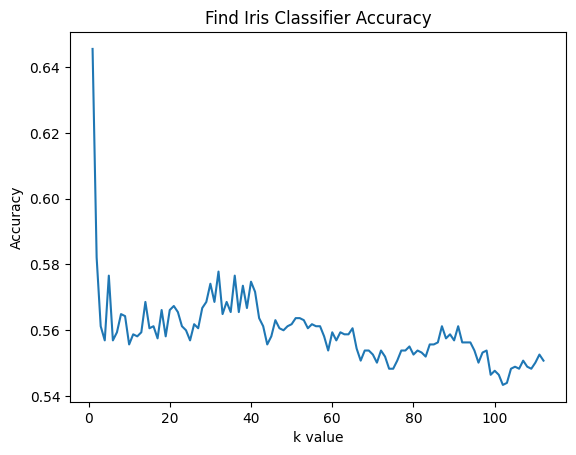

In [31]:
# KNN

from sklearn.neighbors import KNeighborsClassifier

k_range = range(1, 113)
find_accuracy = []

for k in k_range:
  find_model = KNeighborsClassifier(n_neighbors = k)
  find_model.fit(X_train_poly, y_train.values.ravel())

  find_accuracy.append(find_model.score(X_test_poly, y_test))
  
plt.plot(k_range, find_accuracy, label="training accuracy")
plt.xlabel("k value")
plt.ylabel("Accuracy")
plt.title("Find Iris Classifier Accuracy")
plt.show()

# 회귀로 residual sugar 예측

In [32]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


In [33]:
y = df['residual sugar']
y

0       1.9
1       2.6
2       2.3
3       1.9
4       1.9
       ... 
4893    1.6
4894    8.0
4895    1.2
4896    1.1
4897    0.8
Name: residual sugar, Length: 6497, dtype: float64

In [34]:
x = df.drop('residual sugar',axis=1)
x

,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
4894,6.6,0.32,0.36,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1
4895,6.5,0.24,0.19,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
4896,5.5,0.29,0.30,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


## Standard Scale & PolynomialFeature

In [35]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=423)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((4872, 12), (1625, 12), (4872,), (1625,))

In [36]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

In [37]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix

from sklearn.svm import SVR

clf_svm = SVR()
clf_svm.fit(X_train_poly, y_train)

pred_svm = clf_svm.predict(X_test_poly)

print(clf_svm.score(X_train_poly, y_train))

0.9476837322128481


In [38]:
mse = np.sqrt(mean_squared_error(pred_svm, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 0.851496230008295


In [39]:
from sklearn.linear_model import LinearRegression

clf_lr = LinearRegression()
clf_lr.fit(X_train_poly, y_train)

pred_lr = clf_lr.predict(X_test_poly)

print(clf_lr.score(X_train_poly, y_train))

1.0


In [40]:
mse = np.sqrt(mean_squared_error(pred_lr, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 1.492823768334402e-14


In [41]:
from sklearn.tree import DecisionTreeRegressor

clf_dt = DecisionTreeRegressor()
clf_dt.fit(X_train_poly, y_train)

pred_dt = clf_dt.predict(X_test_poly)

print(clf_dt.score(X_train_poly, y_train))

1.0


In [42]:
mse = np.sqrt(mean_squared_error(pred_dt, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 0.012403473458920879


In [43]:
from sklearn.ensemble import RandomForestRegressor

rf_clf = RandomForestRegressor()
rf_clf.fit(X_train_poly, y_train)

pred_rf = rf_clf.predict(X_test_poly)

print(rf_clf.score(X_train_poly, y_train))

0.9967615374430746


In [44]:
mse = np.sqrt(mean_squared_error(pred_rf, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 0.08343848217514788


## Mix Max Scale & PolynomialFeature

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=423)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4872, 12), (1625, 12), (4872,), (1625,))

In [46]:
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [47]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

In [48]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix

from sklearn.svm import SVR

clf_svm = SVR()
clf_svm.fit(X_train_poly, y_train)

pred_svm = clf_svm.predict(X_test_poly)

print(clf_svm.score(X_train_poly, y_train))

0.8581176319958951


In [49]:
mse = np.sqrt(mean_squared_error(pred_svm, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 1.7238814465566454


In [50]:
from sklearn.linear_model import LinearRegression

clf_lr = LinearRegression()
clf_lr.fit(X_train_poly, y_train)

pred_lr = clf_lr.predict(X_test_poly)

print(clf_lr.score(X_train_poly, y_train))

0.9447686065727335


In [51]:
mse = np.sqrt(mean_squared_error(pred_lr, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 1.158064484053546


In [52]:
from sklearn.tree import DecisionTreeRegressor

clf_dt = DecisionTreeRegressor()
clf_dt.fit(X_train_poly, y_train)

pred_dt = clf_dt.predict(X_test_poly)

print(clf_dt.score(X_train_poly, y_train))

0.9999963134787356


In [53]:
mse = np.sqrt(mean_squared_error(pred_dt, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 1.6031921282241877


In [54]:
from sklearn.ensemble import RandomForestRegressor

rf_clf = RandomForestRegressor()
rf_clf.fit(X_train_poly, y_train)

pred_rf = rf_clf.predict(X_test_poly)

print(rf_clf.score(X_train_poly, y_train))

0.9903376234606774


In [55]:
mse = np.sqrt(mean_squared_error(pred_rf, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 1.0718444764635524


## Robust Scale & PolynomialFeature

In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=423)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4872, 12), (1625, 12), (4872,), (1625,))

In [57]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [58]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

In [59]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix

from sklearn.svm import SVR

clf_svm = SVR()
clf_svm.fit(X_train_poly, y_train)

pred_svm = clf_svm.predict(X_test_poly)

print(clf_svm.score(X_train_poly, y_train))

0.7408036305130494


In [60]:
mse = np.sqrt(mean_squared_error(pred_svm, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 2.2668387335689513


In [61]:
from sklearn.linear_model import LinearRegression

clf_lr = LinearRegression()
clf_lr.fit(X_train_poly, y_train)

pred_lr = clf_lr.predict(X_test_poly)

print(clf_lr.score(X_train_poly, y_train))

0.9447796880876089


In [62]:
mse = np.sqrt(mean_squared_error(pred_lr, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 1.1588189696649172


In [63]:
from sklearn.tree import DecisionTreeRegressor

clf_dt = DecisionTreeRegressor()
clf_dt.fit(X_train_poly, y_train)

pred_dt = clf_dt.predict(X_test_poly)

print(clf_dt.score(X_train_poly, y_train))

0.9999963134787356


In [64]:
mse = np.sqrt(mean_squared_error(pred_dt, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 1.6937564078788807


In [65]:
from sklearn.ensemble import RandomForestRegressor

rf_clf = RandomForestRegressor()
rf_clf.fit(X_train_poly, y_train)

pred_rf = rf_clf.predict(X_test_poly)

print(rf_clf.score(X_train_poly, y_train))

0.9888411743080076


In [66]:
mse = np.sqrt(mean_squared_error(pred_rf, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 1.1620663397721054
